## Observations and Insights 

In [1]:
# Dependencies and Setup
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import random
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how="outer")

# Display the data table for preview
merged_df.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Check the number of mice.
total_mice = merged_df["Mouse ID"].nunique()
total_mice

249

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 

cleaned_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])


In [4]:
# Drop any duplicate rows

cleaned_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Recheck the number of mice
cleaned_df["Mouse ID"].nunique()

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.

regimen_group = cleaned_df.groupby(["Drug Regimen"])

tumors_series = regimen_group["Tumor Volume (mm3)"]

mean_tumor = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sd_tumor = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [7]:
new_df = pd.concat([mean_tumor, median_tumor, var_tumor, sd_tumor, sem], axis=1)

cols = []
count = 1
for column in new_df.columns:
    if column == "Tumor Volume (mm3)":
        cols.append(f"Tumor Volume (mm3)_{count}")
        count+=1
        continue
    cols.append(column)
new_df.columns = cols

renamed_df = new_df.rename(columns={
    "Tumor Volume (mm3)_1":"Mean", 
    "Tumor Volume (mm3)_2":"Median", 
    "Tumor Volume (mm3)_3": "Variance",
    "Tumor Volume (mm3)_4": "Std Dev",
    "Tumor Volume (mm3)_5": "SEM"})

renamed_df


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


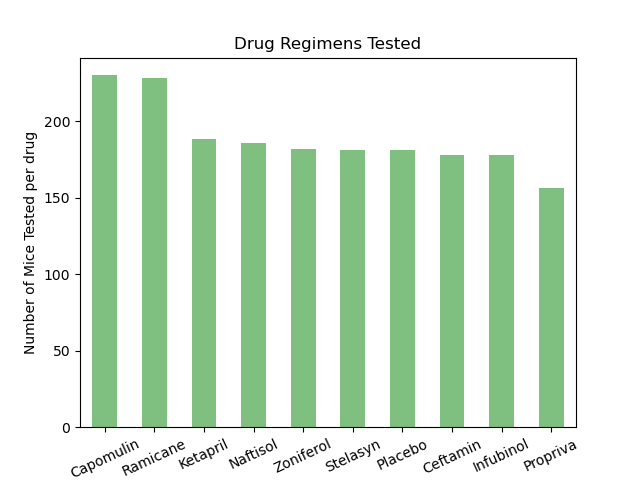

Text(0, 0.5, 'Number of Mice Tested per drug')

In [21]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen

drug_regimens = cleaned_df["Drug Regimen"].value_counts()
drug_regimens.plot(kind="bar", color='g', alpha=0.5, align='center')

plt.xticks(rotation=25)
plt.title("Drug Regimens Tested")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice Tested per drug")

<IPython.core.display.Javascript object>


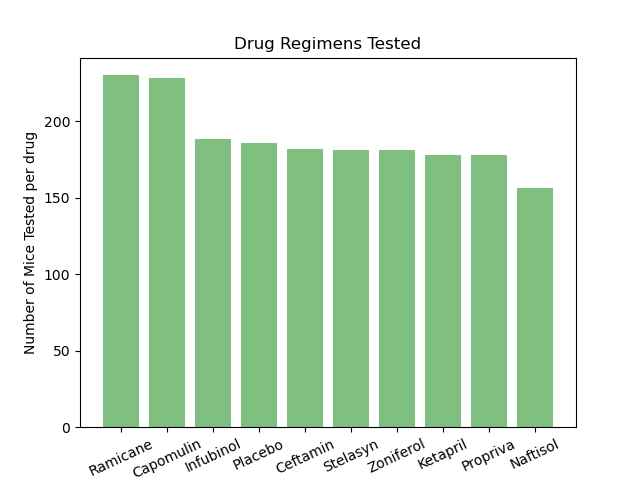

Text(0, 0.5, 'Number of Mice Tested per drug')

In [34]:
# Generate identical bar plot using pyplot instead of pandas.
drug_regimens = cleaned_df["Drug Regimen"].value_counts()
x_axis = cleaned_df["Drug Regimen"].unique()

plt.bar(x_axis, drug_regimens, color='g', alpha=0.5, align='center')

plt.xticks(rotation=25)
plt.title("Drug Regimens Tested")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice Tested per drug")

<IPython.core.display.Javascript object>


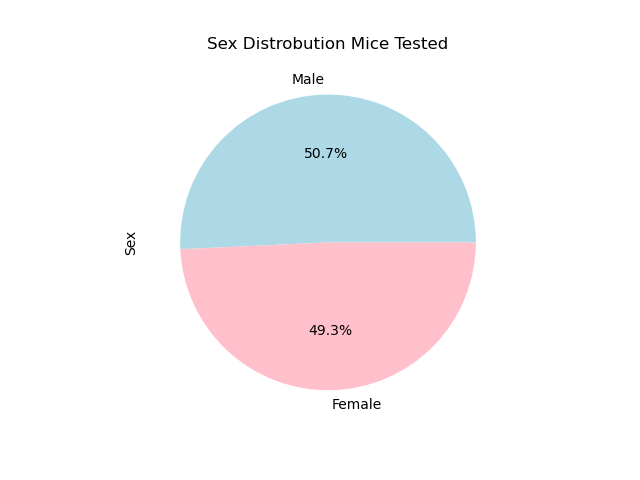

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
data = cleaned_df["Sex"].value_counts()
labels = cleaned_df["Sex"].unique()
colors = ["lightblue", "Pink"]

data.plot(kind="pie", labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Sex Distrobution Mice Tested")
plt.show()

<IPython.core.display.Javascript object>


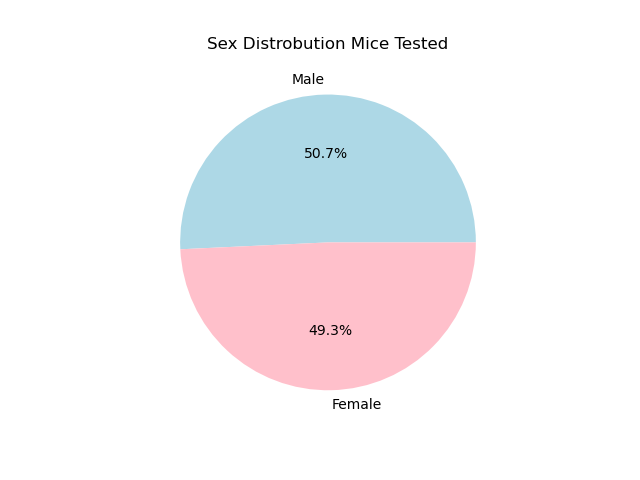

In [28]:
# Generate identical pie plot using pyplot

data = cleaned_df["Sex"].value_counts()
labels = cleaned_df["Sex"].unique()
colors = ["lightblue", "Pink"]

plt.pie(data, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Sex Distrobution Mice Tested")
plt.show()


## Quartiles, Outliers and Boxplots

In [35]:
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


mouse_group = cleaned_df.groupby("Mouse ID")

max_timepoint = mouse_group["Timepoint"].max()

max_timepoint

tumor_vol = mouse_group["Tumor Volume (mm3)"] at max_timepoint


# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
459,a203,Infubinol,Female,20,23,25,56.793208,1
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
462,a203,Infubinol,Female,20,23,40,63.593490,2
463,a203,Infubinol,Female,20,23,45,67.973419,2


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [13]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.  
# <<<<<< What data? The Tumor Volume?  I am very confused here

quartiles = DATA.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of DATA is: {lowerq}")
print(f"The upper quartile of DATA is: {upperq}")
print(f"The interquartile range of DATA is: {iqr}")
print(f"The the median of DATA is: {quartiles[0.5]} ")

# One method to do this is the following, but you can use whatever method works for you.
##############################################################################
# Put treatments into a list for for loop (and later for plot labels)




# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.




## Line and Scatter Plots

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin




In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



# Observations and Insights